<a href="https://colab.research.google.com/github/23ft/Digital-Modulation-Python/blob/main/QPSK_modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cmath
from numpy import pi, sqrt, sin, cos, zeros, r_

**QPSK - PYTHON [23FT]**

---
**Introduccion**

Inicialmente se tiene que tener presente algunos valores tales como: 

1. **Frecuencia Sampleo** dado en $f_s → \{\frac{Samples}{Sec}\} \{\frac{Pulse}{Sec}\}$

2. **Baudios** dado en $baud → \{\frac{Bits}{Sec}\} $
3. **Lectura/Samples por bit** dado en $Ns → \{\frac{Samples}{Bit}\} $

---
**Configuracion**

A continuacion la celda adyacente posee la configuracion base para el modulado QPSK donde se configura un rango de tiempo $t$ de igual manera se escoge el numero de bits a visualizar $symbolsToShow = 20$ en la grafica ya que el numero de bits fijado se encuentra en $4000$.

In [ ]:
""" Configuracion """
fs = 54100                  # sampling rate - samples/sec - puls/sec
baud = 900                  # symbol rate - bits/sec
Nbits = 12                # number of bits
f0 = 1800                   # carrier Frequency
Ns = int(fs/baud)           # number of Samples per Symbol - samples/bit
N = Nbits * Ns              # Total Number of Samples
t = r_[0.0:N]/fs            # time points
f = r_[0:N/2.0]/N*fs        # Frequency Points

# Rango para bits y tiempo para visualizacion 
symbolsToShow = 40
timeDomainVisibleLimit = np.minimum(Nbits/baud,symbolsToShow/baud)  


---
**Bits de entrada - Señal Digital Modulante - Graficacion**



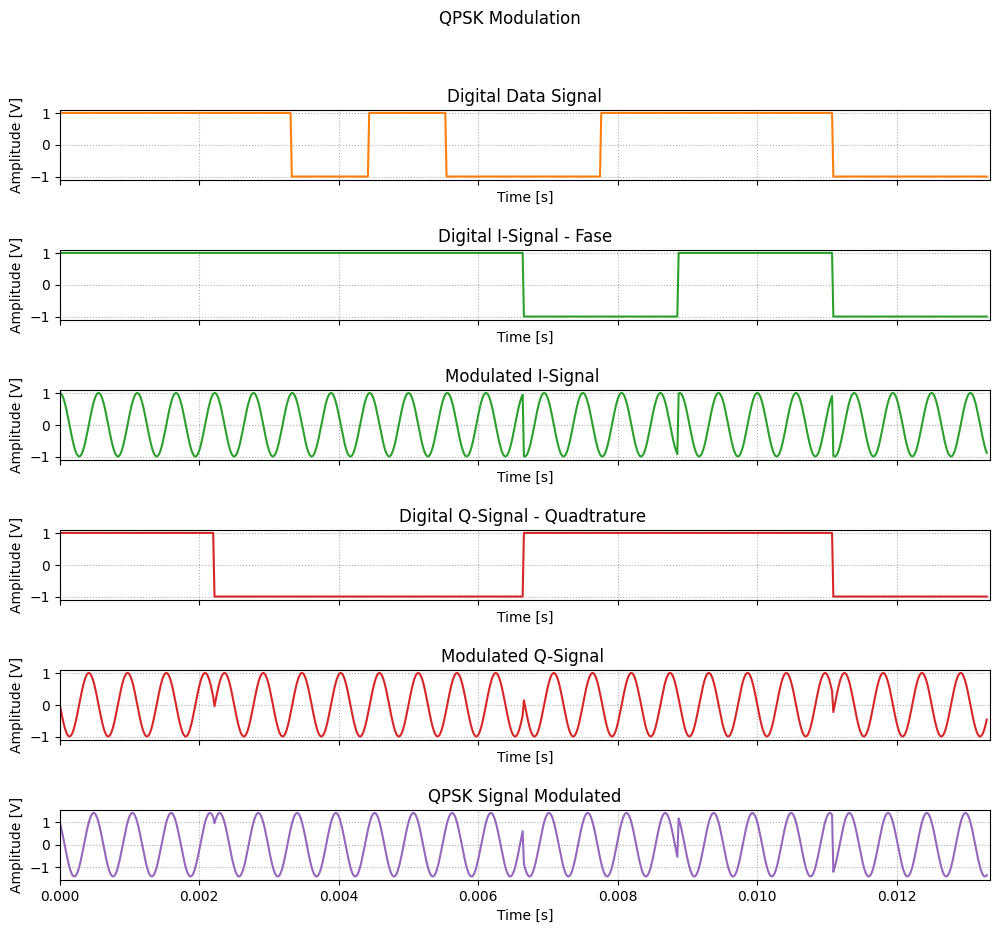

In [ ]:
""" Señal de entrada """
#Input of the modulator
inputBits = np.random.randn(Nbits,1) > 0 
inputSignal = (np.tile(inputBits*2-1,(1,Ns))).ravel() 

#Only calculate when dividable by 2
if(inputBits.size%2 == 0):

    #carrier signals used for modulation. carrier2 has 90° phaseshift compared to carrier1 -> IQ modulation
    carrier1 = cos(2*pi*f0*t)
    carrier2 = cos(2*pi*f0*t+pi/2)

    #Serial-to-Parallel Converter (1/2 of data rate)
    I_bits = inputBits[::2]
    Q_bits = inputBits[1::2]
       
    #Digital-to-Analog Conversion
    I_signal = (np.tile(I_bits*2-1,(1,2*Ns))).ravel()
    Q_signal = (np.tile(Q_bits*2-1,(1,2*Ns)) ).ravel()

    #Multiplicator / mixxer
    I_signal_modulated = I_signal * carrier1
    Q_signal_modulated = Q_signal * carrier2

    #Summation befor transmission
    QPSK_signal = I_signal_modulated + Q_signal_modulated

    #---------- Plot of QPSK Modulating Signals ------------#
    fig, axis = plt.subplots(6,1,sharex='col')
    fig.suptitle('QPSK Modulation', fontsize=12)

    axis[0].plot(t, inputSignal, color='C1')
    #axis[0].set_title('Digital Data Signal (Source Code/ Block Diagram: "inputBits")')
    axis[0].set_title('Digital Data Signal')
    axis[0].set_xlabel('Time [s]')
    axis[0].set_ylabel('Amplitude [V]')
    axis[0].set_xlim(0,timeDomainVisibleLimit)
    axis[0].grid(linestyle='dotted')
    
    
    axis[1].plot(t, I_signal, color='C2')
    #axis[1].set_title('Digital I-Signal (Source Code/ Block Diagram: "I_signal")')
    axis[1].set_title('Digital I-Signal - Fase')
    axis[1].set_xlabel('Time [s]')
    axis[1].set_xlim(0,timeDomainVisibleLimit)
    axis[1].set_ylabel('Amplitude [V]')
    axis[1].grid(linestyle='dotted')

    
    axis[2].plot(t, I_signal_modulated, color='C2')
    #axis[2].set_title('Modulated I-Signal (Source Code/ Block Diagram: "I_signal_modulated")')
    axis[2].set_title('Modulated I-Signal ')
    axis[2].set_xlabel('Time [s]')
    axis[2].set_xlim(0,timeDomainVisibleLimit)
    axis[2].set_ylabel('Amplitude [V]')
    axis[2].grid(linestyle='dotted')
    

    axis[3].plot(t, Q_signal, color='C3')
    #axis[3].set_title('Digital Q-Signal (Source Code/ Block Diagram: "Q_signal")')
    axis[3].set_title('Digital Q-Signal - Quadtrature ')
    axis[3].set_xlabel('Time [s]')
    axis[3].set_xlim(0,timeDomainVisibleLimit)
    axis[3].set_ylabel('Amplitude [V]')
    axis[3].grid(linestyle='dotted')    
         
    axis[4].plot(t, Q_signal_modulated, color='C3')
    #axis[4].set_title('Modulated Q-Signal (Source Code/ Block Diagram: "Q_signal_modulated")')
    axis[4].set_title('Modulated Q-Signal ')
    axis[4].set_xlabel('Time [s]')
    axis[4].set_xlim(0,timeDomainVisibleLimit)
    axis[4].set_ylabel('Amplitude [V]')
    axis[4].grid(linestyle='dotted')
    
    axis[5].plot(t,QPSK_signal, color='C4')
    #axis[5].set_title('QPSK Signal Modulated (Source Code/ Block Diagram: "QPSK_signal")')
    axis[5].set_title('QPSK Signal Modulated')
    axis[5].set_xlabel('Time [s]')
    axis[5].set_xlim(0,timeDomainVisibleLimit)
    axis[5].set_ylabel('Amplitude [V]')
    axis[5].grid(linestyle='dotted')

    
    plt.rcParams['figure.figsize'] = [12, 10]
    plt.subplots_adjust(hspace=1)

  
else:
    print("Error! Number of bits has to be a multiple of 2. Number of Bits entered: "+ str(Nbits)+".")

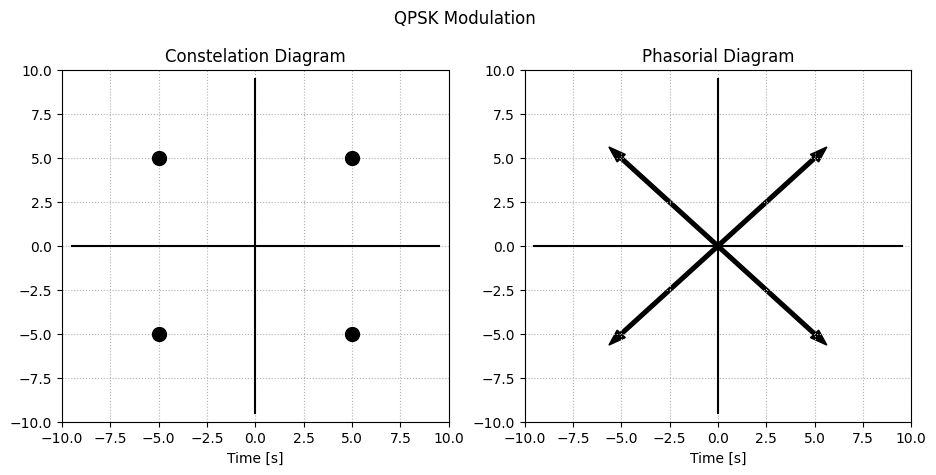

In [2]:
# QPSK

from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["figure.autolayout"] = True

x_values = [-9.5,-1,1,9.5]
y_values = [0]*4
points = [[5,5],
          [5,-5],
          [-5,-5],
          [-5,5]]

fig, axis = plt.subplots(1,2,sharex='col')
fig.suptitle('QPSK Modulation', fontsize=12)

axis[0].set_title('Constelation Diagram')
axis[0].set_xlabel('Time [s]')
axis[0].set_xlim(-10, 10)
axis[0].set_ylim(-10, 10)    
axis[0].grid(linestyle='dotted')

for x in range(0,4,1):
  axis[0].plot(points[x][0],points[x][1], marker="o", markersize=10, color="black")

axis[0].plot(x_values,y_values, color="black")
axis[0].plot(y_values,x_values, color="black")

# Phasorial Diagram
axis[1].set_title('Phasorial Diagram')
axis[1].set_xlabel('Time [s]')
axis[1].grid(linestyle='dotted')
axis[1].set_xlim(-10, 10)
axis[1].set_ylim(-10, 10)

for x in range(0,4,1):
  axis[1].arrow(0,0,points[x][0],points[x][1],width=0.2,color="black")

axis[1].plot(x_values,y_values, color="black")
axis[1].plot(y_values,x_values, color="black")

plt.rcParams['figure.figsize'] = [6.4 + 3, 4.8]


plt.show()